In [1]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

In [9]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/sunqiaoyubing/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39h6e9494a_0         1.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.12.0-py39hecd8cb5_0 --> conda-forge::cond

In [2]:
# import CC_Fraud from your computer, you need to change your source...

df = pd.read_csv (r'/Users/sunqiaoyubing/Downloads/CC_Fraud.csv')
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
from pandas import DataFrame
X_all = df.drop(['Class'], axis=1)
y_all = df['Class']

In [4]:
#data split to test&train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=25
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 0.17
% Positive class in Test  = 0.2


In [5]:
#logistics regression without penalty
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.010022
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.187      
Dependent Variable: Class            AIC:              4626.7912  
Date:               2022-05-08 01:43 BIC:              4936.8839  
No. Observations:   227845           Log-Likelihood:   -2283.4    
Df Model:           29               LL-Null:          -2810.3    
Df Residuals:       227815           LLR p-value:      3.7789e-203
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Time      -0.0001     0.0000   -50.1965   0.0000   -0.0001   -0.0001
V1         0.6028     0.0397    15.1847   0.

In [6]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.998924705948436


/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#logreg = LogisticRegression(penalty='l2')
logreg = LogisticRegression(penalty='l2',C= 1000)
logreg.fit(X_train, y_train)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000)

In [8]:
# Accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [9]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.79      0.61      0.69       112

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



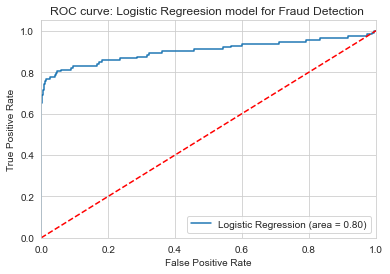

In [10]:

# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Logistic Regreesion model for Fraud Detection ')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [11]:
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 0.17
% Positive class in Test  = 0.2


Accuracy = 1.00
Recall = 0.61



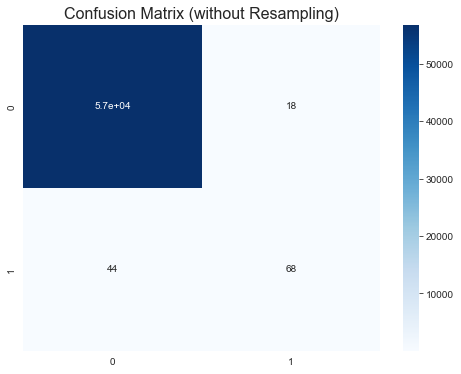

In [12]:
# Confusion Matrix
from sklearn.metrics import recall_score
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [13]:
# Average precision score
y_score = logreg.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.606801944833229


In [14]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.605241870575791


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.61')

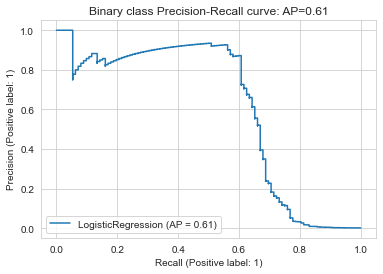

In [15]:
# AUPRC
disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [16]:
# MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.6923486432657399

In [19]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)

grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=10)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

[Text(510.6545454545455, 647.79, 'X[17] <= -2.704\ngini = 0.003\nsamples = 227845\nvalue = [227465, 380]'),
 Text(351.7090909090909, 530.01, 'X[10] <= -1.176\ngini = 0.376\nsamples = 339\nvalue = [85, 254]'),
 Text(216.43636363636364, 412.22999999999996, 'X[26] <= -0.225\ngini = 0.292\nsamples = 304\nvalue = [54, 250]'),
 Text(108.21818181818182, 294.45, 'X[27] <= 1.06\ngini = 0.466\nsamples = 103\nvalue = [38, 65]'),
 Text(54.10909090909091, 176.66999999999996, 'X[14] <= -2.822\ngini = 0.2\nsamples = 62\nvalue = [7, 55]'),
 Text(27.054545454545455, 58.889999999999986, 'gini = 0.101\nsamples = 56\nvalue = [3, 53]'),
 Text(81.16363636363636, 58.889999999999986, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(162.3272727272727, 176.66999999999996, 'X[29] <= 94.99\ngini = 0.369\nsamples = 41\nvalue = [31, 10]'),
 Text(135.27272727272728, 58.889999999999986, 'gini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(189.38181818181818, 58.889999999999986, 'gini = 0.32\nsamples = 10\nvalue =

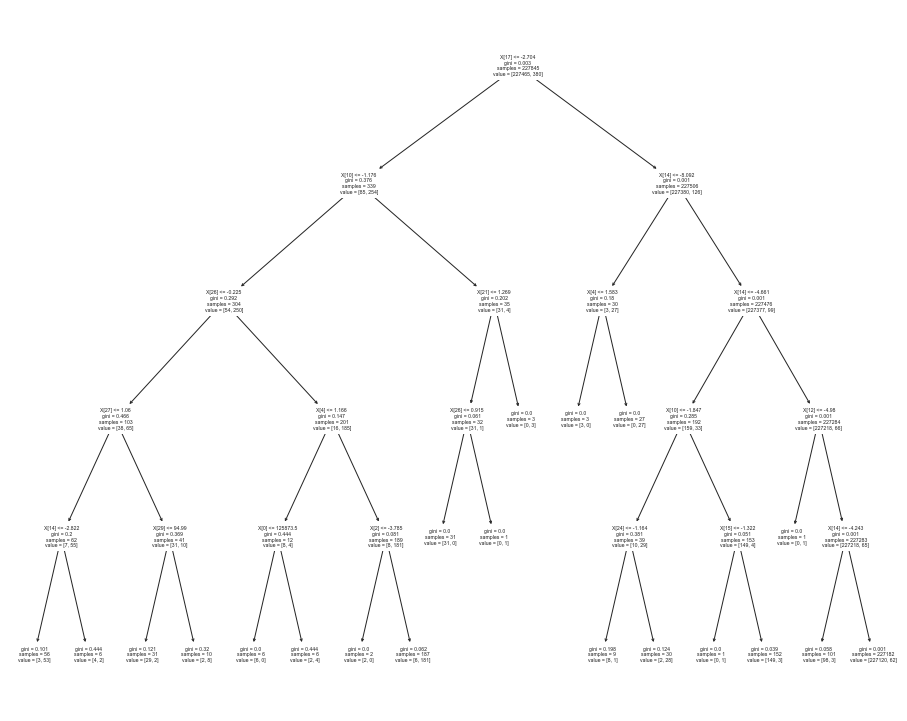

In [23]:
# Plot Tree Model
plt.figure(figsize=(16,13))

from sklearn import tree

y_pred = clf_gini.predict(X_test)
tree.plot_tree(clf_gini.fit(X_train,y_train)) 

In [31]:
import graphviz 
from sklearn import tree
tree.export_graphviz(clf_gini)

In [41]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.86      0.79      0.83       112

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy = 1.00
Recall = 0.79



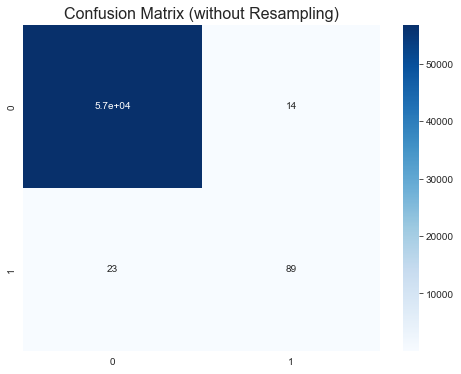

In [42]:
# Evaluate: Confusion Matrix
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [43]:
# Average precision score
y_score = clf_gini.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.6947737486461871


In [44]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.662973391684117


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.69')

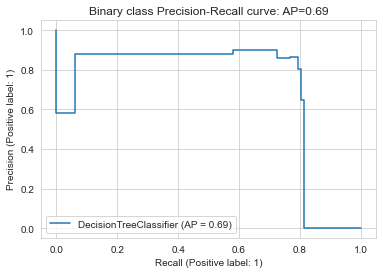

In [45]:
# AUPRC
disp = plot_precision_recall_curve(clf_gini, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [46]:
# MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.8283109427859268

In [ ]:
rf_clf = RandomForestClassifier()

parameters = {'n_estimators': [10,20,25],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30]
             }

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf = grid_obj.best_estimator_

rf_clf.fit(X_train, y_train)

In [49]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# AdaBoosting for best result of Random Forest
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=10)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)

In [60]:
# prediction and accuracy
y = ada.predict(X_test)
accuracy_score(y, y_test)

0.9995962220427653

In [61]:
# Classification Report
from sklearn.metrics import classification_report
print (classification_report(y, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.86      0.93      0.89       103

    accuracy                           1.00     56962
   macro avg       0.93      0.97      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [54]:
#rf
#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# prediction 
y_pred = ada.predict(X_test)
print (y_pred) 

[0 0 0 ... 0 0 0]


In [63]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.93      0.86      0.89       112

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy = 1.00
Recall = 0.86



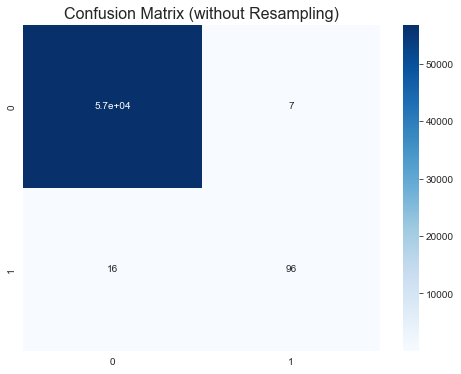

In [64]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [66]:
# Average precision score
y_score = ada.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.8969901430058648


In [67]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.8990726737492766


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.90')

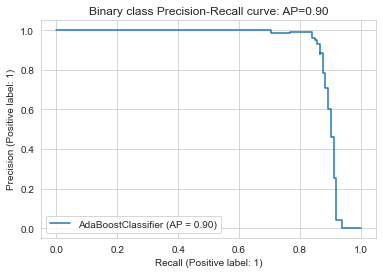

In [68]:
# AUPRC
disp = plot_precision_recall_curve(ada, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [69]:
# MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.8936075780442725

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

# defining parameter range
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [5]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(X_train,y_train)

SVC()

In [6]:
y_pred = clf_svm.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.00      0.00      0.00       112

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [7]:
y_score = clf_svm.decision_function(X_test)
print(y_score)

[-1.00024498 -0.99984748 -0.99993214 ... -0.99988974 -1.00042915
 -0.99972022]


Accuracy = 1.00
Recall = 0.00



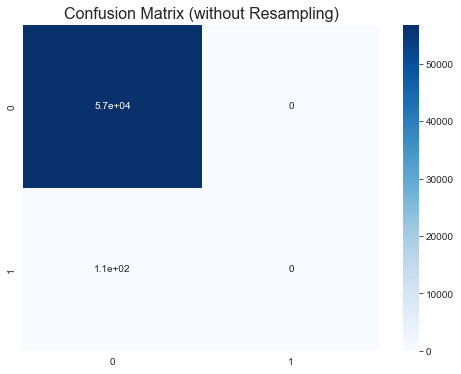

In [8]:
# Evaluate
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without Resampling)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [9]:
# Average precision score

average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.09824756565221343


In [10]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.09811122248088422


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=0.10')

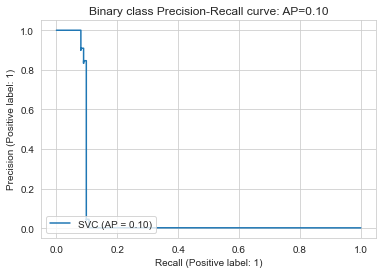

In [11]:
# AUPRC
disp = plot_precision_recall_curve(clf_svm, X_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [12]:
# MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

/Users/sunqiaoyubing/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0